# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [9]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    """
    Build your own model
    """
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 20
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [10]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0825 19:02:37.948406 16284 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0825 19:02:37.952369 16284 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0825 19:02:38.008219 16284 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 19:02:38.009217 16284 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 19:02:38.01446

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0825 19:02:38.216710 16284 deprecation.py:323] From C:\Users\sam0522\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 187us/step - loss: 2.0431 - acc: 0.2538 - val_loss: 1.8216 - val_acc: 0.3506
Epoch 2/20
50000/50000 [==============================] - 9s 182us/step - loss: 1.8350 - acc: 0.3393 - val_loss: 1.7459 - val_acc: 0.3707
Epoch 3/20
50000/50000 [==============================] - 8s 162us/step - loss: 1.7378 - acc: 0.3768 - val_loss: 1.9036 - val_acc: 0.3319
Epoch 4/20
50000/50000 [==============================] - 8s 159us/step - loss: 1.6828 - acc: 0.3994 - val_loss: 1.6969 - val_acc: 0.4033
Epoch 5/20
50000/50000 [==============================] - 8s 160us/step - loss: 1.6403 - acc: 0.4155 - val_loss: 1.7497 - val_acc: 0.3871
Epoch 6/20
50000/50000 [==============================] - 8s 160us/step - loss: 1.5935 - acc: 0.4316 - val_loss: 1.6636 - val_acc: 0.4040
Epoch 7/20
50000/50000 [==============================] - 8s 151us/step - loss: 1.5580 - acc: 0.4444 - val_loss: 1.6204 - 

50000/50000 [==============================] - 8s 168us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/20
50000/50000 [==============================] - 8s 166us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/20
50000/50000 [==============================] - 8s 166us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/20
50000/50000 [==============================] - 9s 173us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/20
50000/50000 [==============================] - 8s 168us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/20
50000/50000 [==============================] - 8s 168us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/20
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/20
50000/50000 [======

50000/50000 [==============================] - 7s 149us/step - loss: 1.7375 - acc: 0.3898 - val_loss: 1.7571 - val_acc: 0.3733
Epoch 6/20
50000/50000 [==============================] - 7s 147us/step - loss: 1.7046 - acc: 0.4035 - val_loss: 1.7218 - val_acc: 0.3911
Epoch 7/20
50000/50000 [==============================] - 7s 147us/step - loss: 1.6780 - acc: 0.4119 - val_loss: 1.7556 - val_acc: 0.3718
Epoch 8/20
50000/50000 [==============================] - 7s 148us/step - loss: 1.6555 - acc: 0.4176 - val_loss: 1.6732 - val_acc: 0.3990
Epoch 9/20
50000/50000 [==============================] - 7s 147us/step - loss: 1.6346 - acc: 0.4245 - val_loss: 1.6580 - val_acc: 0.4037
Epoch 10/20
50000/50000 [==============================] - 7s 149us/step - loss: 1.6143 - acc: 0.4319 - val_loss: 1.6241 - val_acc: 0.4272
Epoch 11/20
50000/50000 [==============================] - 7s 148us/step - loss: 1.5977 - acc: 0.4375 - val_loss: 1.6122 - val_acc: 0.4236
Epoch 12/20
50000/50000 [==================

50000/50000 [==============================] - 8s 169us/step - loss: 14.5060 - acc: 0.1000 - val_loss: 14.5056 - val_acc: 0.1000
Epoch 8/20
50000/50000 [==============================] - 9s 170us/step - loss: 14.4934 - acc: 0.1001 - val_loss: 14.5060 - val_acc: 0.1000
Epoch 9/20
50000/50000 [==============================] - 8s 168us/step - loss: 14.4879 - acc: 0.1002 - val_loss: 14.5059 - val_acc: 0.1000
Epoch 10/20
50000/50000 [==============================] - 8s 168us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5050 - val_acc: 0.1000
Epoch 11/20
50000/50000 [==============================] - 8s 167us/step - loss: 14.5032 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/20
50000/50000 [==============================] - 8s 167us/step - loss: 14.5060 - acc: 0.1000 - val_loss: 14.5061 - val_acc: 0.1000
Epoch 13/20
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.0992 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/20
50000/50000 [==

50000/50000 [==============================] - 8s 150us/step - loss: 1.9868 - acc: 0.3102 - val_loss: 1.9772 - val_acc: 0.3123
Epoch 10/20
50000/50000 [==============================] - 7s 149us/step - loss: 1.9684 - acc: 0.3161 - val_loss: 1.9603 - val_acc: 0.3144
Epoch 11/20
50000/50000 [==============================] - 7s 149us/step - loss: 1.9518 - acc: 0.3233 - val_loss: 1.9451 - val_acc: 0.3258
Epoch 12/20
50000/50000 [==============================] - 7s 150us/step - loss: 1.9367 - acc: 0.3290 - val_loss: 1.9308 - val_acc: 0.3287
Epoch 13/20
50000/50000 [==============================] - 7s 149us/step - loss: 1.9232 - acc: 0.3334 - val_loss: 1.9181 - val_acc: 0.3338
Epoch 14/20
50000/50000 [==============================] - 7s 150us/step - loss: 1.9104 - acc: 0.3379 - val_loss: 1.9057 - val_acc: 0.3410
Epoch 15/20
50000/50000 [==============================] - 7s 150us/step - loss: 1.8986 - acc: 0.3416 - val_loss: 1.8945 - val_acc: 0.3505
Epoch 16/20
50000/50000 [==============

Epoch 12/20
50000/50000 [==============================] - 8s 169us/step - loss: 1.5094 - acc: 0.4738 - val_loss: 1.5588 - val_acc: 0.4470
Epoch 13/20
50000/50000 [==============================] - 8s 167us/step - loss: 1.4959 - acc: 0.4768 - val_loss: 1.5227 - val_acc: 0.4557
Epoch 14/20
50000/50000 [==============================] - 8s 168us/step - loss: 1.4846 - acc: 0.4825 - val_loss: 1.5337 - val_acc: 0.4536
Epoch 15/20
50000/50000 [==============================] - 9s 173us/step - loss: 1.4738 - acc: 0.4871 - val_loss: 1.5110 - val_acc: 0.4672
Epoch 16/20
50000/50000 [==============================] - 8s 170us/step - loss: 1.4631 - acc: 0.4899 - val_loss: 1.5138 - val_acc: 0.4625
Epoch 17/20
50000/50000 [==============================] - 8s 168us/step - loss: 1.4546 - acc: 0.4924 - val_loss: 1.5183 - val_acc: 0.4608
Epoch 18/20
50000/50000 [==============================] - 8s 167us/step - loss: 1.4439 - acc: 0.4952 - val_loss: 1.5004 - val_acc: 0.4707
Epoch 19/20
50000/50000 [==

Epoch 15/20
50000/50000 [==============================] - 7s 148us/step - loss: 2.1613 - acc: 0.2453 - val_loss: 2.1564 - val_acc: 0.2506
Epoch 16/20
50000/50000 [==============================] - 7s 149us/step - loss: 2.1543 - acc: 0.2489 - val_loss: 2.1495 - val_acc: 0.2532
Epoch 17/20
50000/50000 [==============================] - 8s 150us/step - loss: 2.1477 - acc: 0.2533 - val_loss: 2.1430 - val_acc: 0.2573
Epoch 18/20
50000/50000 [==============================] - 7s 149us/step - loss: 2.1412 - acc: 0.2565 - val_loss: 2.1366 - val_acc: 0.2598
Epoch 19/20
50000/50000 [==============================] - 8s 151us/step - loss: 2.1351 - acc: 0.2596 - val_loss: 2.1306 - val_acc: 0.2631
Epoch 20/20
50000/50000 [==============================] - 8s 150us/step - loss: 2.1292 - acc: 0.2624 - val_loss: 2.1248 - val_acc: 0.2652
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)          

Epoch 18/20
50000/50000 [==============================] - 9s 171us/step - loss: 1.7294 - acc: 0.4011 - val_loss: 1.7313 - val_acc: 0.3992
Epoch 19/20
50000/50000 [==============================] - 8s 168us/step - loss: 1.7248 - acc: 0.4027 - val_loss: 1.7270 - val_acc: 0.4015
Epoch 20/20
50000/50000 [==============================] - 8s 168us/step - loss: 1.7205 - acc: 0.4056 - val_loss: 1.7231 - val_acc: 0.3998
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________________

Experiment with LR = 0.000010, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoc

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 207us/step - loss: 2.1472 - acc: 0.2426 - val_loss: 2.0140 - val_acc: 0.3067
Epoch 2/20
50000/50000 [==============================] - 10s 201us/step - loss: 1.9561 - acc: 0.3218 - val_loss: 1.9051 - val_acc: 0.3400
Epoch 3/20
50000/50000 [==============================] - 10s 202us/step - loss: 1.8699 - acc: 0.3520 - val_loss: 1.8412 - val_acc: 0.3605
Epoch 4/20
50000/50000 [==============================] - 10s 208us/step - loss: 1.8187 - acc: 0.3702 - val_loss: 1.7991 - val_acc: 0.3738
Epoch 5/20
50000/50000 [==============================] - 10s 204us/step - loss: 1.7796 - acc: 0.3857 - val_loss: 1.7698 - val_acc: 0.3863
Epoch 6/20
50000/50000 [==============================] - 10s 203us/step - loss: 1.7490 - acc: 0.3942 - val_loss: 1.7385 - val_acc: 0.3958
Epoch 7/20
50000/50000 [==============================] - 11s 224us/step - loss: 1.7232 - acc: 0.4031 - val_loss: 1.

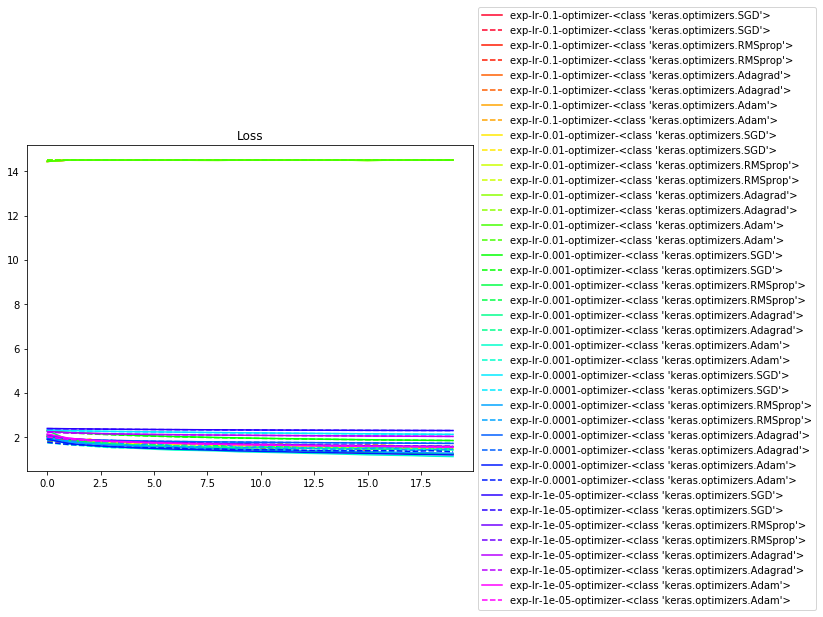

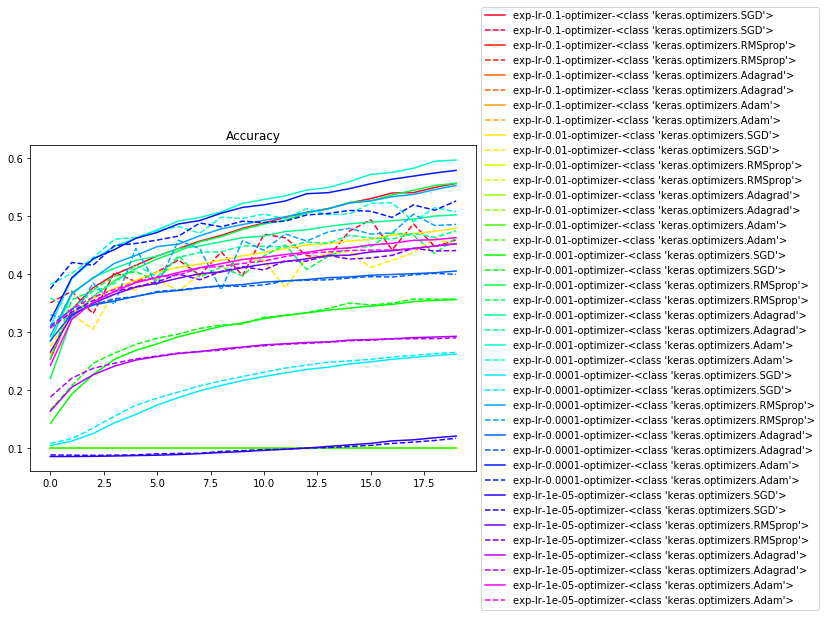

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
